# ¡Llena ese carrito!

# Introducción

Instacart es una plataforma de entregas de comestibles donde la clientela puede registrar un pedido y hacer que se lo entreguen, similar a Uber Eats y Door Dash.
El conjunto de datos que te hemos proporcionado tiene modificaciones del original. Redujimos el tamaño del conjunto para que tus cálculos se hicieran más rápido e introdujimos valores ausentes y duplicados. Tuvimos cuidado de conservar las distribuciones de los datos originales cuando hicimos los cambios.

Debes completar tres pasos. Para cada uno de ellos, escribe una breve introducción que refleje con claridad cómo pretendes resolver cada paso, y escribe párrafos explicatorios que justifiquen tus decisiones al tiempo que avanzas en tu solución.  También escribe una conclusión que resuma tus hallazgos y elecciones.


## Diccionario de datos

Hay cinco tablas en el conjunto de datos, y tendrás que usarlas todas para hacer el preprocesamiento de datos y el análisis exploratorio de datos. A continuación se muestra un diccionario de datos que enumera las columnas de cada tabla y describe los datos que contienen.

- __`instacart_orders.csv`__: cada fila corresponde a un pedido en la aplicación Instacart.

    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    
    - `'user_id'`: número de ID que identifica de manera única la cuenta de cada cliente.
    
    - `'order_number'`: el número de veces que este cliente ha hecho un pedido.
    
    - `'order_dow'`: día de la semana en que se hizo el pedido (0 si es domingo).
    
    - `'order_hour_of_day'`: hora del día en que se hizo el pedido.
    
    - `'days_since_prior_order'`: número de días transcurridos desde que este cliente hizo su pedido anterior.
    
- __`products.csv`__: cada fila corresponde a un producto único que pueden comprar los clientes.

    - `'product_id'`: número ID que identifica de manera única cada producto.
    
    - `'product_name'`: nombre del producto.
    
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
    
- __`order_products.csv`__: cada fila corresponde a un artículo pedido en un pedido.

    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    
    - `'product_id'`: número ID que identifica de manera única cada producto.
    
    - `'add_to_cart_order'`: el orden secuencial en el que se añadió cada artículo en el carrito.
    
    - `'reordered'`: 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.
    
- __`aisles.csv`__

    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    
    - `'aisle'`: nombre del pasillo.
    
- __`departments.csv`__

    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
    
    - `'department'`: nombre del departamento.

# Paso 1. Descripción de los datos

Lee los archivos de datos (`/datasets/instacart_orders.csv`, `/datasets/products.csv`, `/datasets/aisles.csv`, `/datasets/departments.csv` y `/datasets/order_products.csv`) con `pd.read_csv()` usando los parámetros adecuados para leer los datos correctamente. Verifica la información para cada DataFrame creado.


## Plan de solución

Utilizaré **`pd.read_csv()`** para cargar los archivos CSV proporcionados. Asumiendo que todos los archivos utilizan el punto y coma (;) como delimitador (como se vio anteriormente), especificaré este parámetro al cargar los datos. Además, al imprimir los recuentos no nulos, incluiré **`show_counts = True`** al usar **`info()`**. Finalmente, echaremos un vistazo a las primeras filas de cada DataFrame con **`head()`** para verificar de que los datos se han leído correctamente.

In [1]:
# importar librerías
import numpy as np  
import pandas as pd 

In [2]:
# leer conjuntos de datos en los DataFrames
orders = pd.read_csv('/datasets/instacart_orders.csv', delimiter=';')
products = pd.read_csv('/datasets/products.csv', delimiter=';')
order_products = pd.read_csv('/datasets/order_products.csv', delimiter=';')
aisles = pd.read_csv('/datasets/aisles.csv', delimiter=';')
departments = pd.read_csv('/datasets/departments.csv', delimiter=';')

In [3]:
 # Información del DataFrame orders
orders.info(show_counts = True)
print()
print(orders.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB

   order_id  user_id  order_number  order_dow  order_hour_of_day  \
0   1515936   183418            11          6                 13   
1   1690866   163593             5          5                 12   
2   1454967    39980             4          5                 19   
3   1768857    82516            56          0                 20   
4   3007858   196724             2          4                 12  

In [4]:
# Información del DataFrame products
products.info(show_counts = True)
print()

print(products.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB

   product_id                                       product_name  aisle_id  \
0           1                         Chocolate Sandwich Cookies        61   
1           2                                   All-Seasons Salt       104   
2           3               Robust Golden Unsweetened Oolong Tea        94   
3           4  Smart Ones Classic Favorites Mini Rigatoni Wit...        38   
4           5                          Green Chile Anytime Sauce         5   

   department_id  
0             19  
1             13  
2              7  
3              1  
4             13  


In [5]:
# Información del DataFrame order_products
order_products.info(show_counts = True) 
print()

print(order_products.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB

   order_id  product_id  add_to_cart_order  reordered
0   2141543       11440               17.0          0
1    567889        1560                1.0          1
2   2261212       26683                1.0          1
3    491251        8670               35.0          1
4   2571142        1940                5.0          1


In [6]:
# Información del DataFrame aisles
aisles.info(show_counts = True) 
print()

print(aisles.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB

   aisle_id                       aisle
0         1       prepared soups salads
1         2           specialty cheeses
2         3         energy granola bars
3         4               instant foods
4         5  marinades meat preparation


In [7]:
 # Información del DataFrame departments
departments.info(show_counts = True)
print()

print(departments.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes

   department_id department
0              1     frozen
1              2      other
2              3     bakery
3              4    produce
4              5    alcohol


## Conclusiones

**1. Completitud y Calidad de los Datos**:

* La mayoría de los DataFrames contienen valores nulos en algunas de sus columnas. Específicamente, **`orders`** y **`products`** muestran ausencias que podrían afectar los análisis relacionados con la frecuencia de pedidos y la popularidad de los productos, respectivamente.


* El DataFrame **`order_products`**, aunque es el más grande, muestra una alta integridad con solo unos pocos valores nulos en **`add_to_cart_order`**. Esto indica un registro de datos bastante confiable para los detalles de los pedidos.

**2. Tipos de Datos:**

* Los tipos de datos parecen adecuados para la mayoría de las columnas, aunque algunas, como **`days_since_prior_order`** en **`orders`** y **`add_to_cart_order`** en **`order_products`**, podrían necesitar ajustes si decidimos tratar todos los valores como enteros.

**3. Potencial para Análisis:**

* Los datos ofrecen un gran potencial para analizar comportamientos de compra, frecuencias de pedido, y preferencias de productos entre los usuarios de Instacart.


* Las relaciones entre los diferentes DataFrames (como productos y departamentos, o pedidos y productos) permitirán análisis multidimensionales que pueden revelar patrones interesantes y útiles.


# Paso 2. Preprocesamiento de los datos

Preprocesaremos los datos de la siguiente manera:

- Verificar y corregir los tipos de datos (por ejemplo, asegurarse de que las columnas de ID sean números enteros).

- Identifica y completa los valores ausentes.

- Identifica y elimina los valores duplicados.

Explicar qué tipos de valores ausentes y duplicados encontraste, cómo los completaste o eliminaste y por qué usaste esos métodos. ¿Por qué crees que estos valores ausentes y duplicados pueden haber estado presentes en el conjunto de datos?

## Plan de solución

**1. Verificación y Corrección de Tipos de Datos**

* **Columnas de ID**: Asegurarme de que `order_id`, `user_id`, `product_id`, `aisle_id`, y `department_id` estén en formato entero. Utilizaré `pd.to_numeric()` o `astype(int)` según sea necesario.


* **Datos Temporales**: Verificar que `order_hour_of_day` y `order_dow` estén dentro de los rangos apropiados (0-23 para horas y 0-6 para días de la semana) y corregir cualquier valor atípico.


* **Datos Flotantes**: Convertir `days_since_prior_order` y `add_to_cart_order a enteros`, tratando adecuadamente los valores nulos para evitar errores de conversión.

**2. Identificación y Completación de Valores Ausentes**

* **Detección de Nulos**: Usaré `df.isnull().sum()` para identificar columnas con valores ausentes en cada DataFrame.


* **Tratamiento de Nulos**:


  - **`days_since_prior_order`**: Podría dejar estos valores como `NaN` si representan el primer pedido de un cliente, o imputar un `valor específico` si se necesita mantener la `integridad numérica`.


  - **`product_name`**: Imputar los nombres de productos faltantes con 'Unknown Product' para mantener la integridad de los análisis relacionados.


  - **`add_to_cart_order`**: Imputar los valores faltantes basándome en el máximo `add_to_cart_order` más uno para cada `order_id` correspondiente.


**3. Identificación y Eliminación de Valores Duplicados**


* **Revisión de Duplicados**: Comprobar registros duplicados en cada DataFrame usando `df.duplicated().sum()`.


* **Eliminación de Duplicados**: Si se encuentran duplicados, los eliminaré con `df.drop_duplicates()`, asegurando que cada registro en la base de datos sea único.


**Razones Detrás del Preprocesamiento**


* **Valores Ausentes**: Pueden ser causados por errores de entrada de datos, fallos en la recopilación de datos, o características específicas del proceso de negocio (como nuevos usuarios).


* **Duplicados**: Podrían ser el resultado de errores de carga de datos, problemas de sincronización en sistemas, o múltiples ingresos de la misma transacción.


Este plan de preprocesamiento se centrará en la limpieza y corrección de los datos para asegurar que son aptos para análisis. Al final de este paso, los datos estarán listos para ser analizados profundamente en las etapas subsecuentes del proyecto, lo que permitirá generar insights precisos y útiles sobre los hábitos de compra de los clientes de Instacart.

## Tratamiento de valores duplicados

### `orders` data frame

In [8]:
orders.duplicated().sum() # Revisar si hay pedidos duplicados

15

In [9]:
duplicated_orders = orders[orders.duplicated()] # Creamos un Dataframe llamado duplicated_orders para visualizar la data
duplicated_orders

order_id  user_id  order_number  order_dow  order_hour_of_day  \
145574    794638    50898            24          3                  2   
223105   2160484   107525            16          3                  2   
230807   1918001   188546            14          3                  2   
266232   1782114   106752             1          3                  2   
273805   1112182   202304            84          3                  2   
284038   2845099    31189            11          3                  2   
311713   1021560    53767             3          3                  2   
321100    408114    68324             4          3                  2   
323900   1919531   191501            32          3                  2   
345917   2232988    82565             1          3                  2   
371905    391768    57671            19          3                  2   
394347    467134    63189            21          3                  2   
411408   1286742   183220            48          3                  2   
415163   2282673    86751            49          3                  2   
441599   2125197    14050            48          3                  2   

        days_since_prior_order  
145574                     2.0  
223105                    30.0  
230807                    16.0  
266232                     NaN  
273805                     6.0  
284038                     7.0  
311713                     9.0  
321100                    18.0  
323900                     7.0  
345917                     NaN  
371905                    10.0  
394347                     2.0  
411408                     4.0  
415163                     2.0  
441599                     3.0

#### ¿Existen líneas duplicadas? Si sí, ¿qué tienen en común?

* Todos se realizaron un miércoles (**order_dow = 3**).


* Todos se realizaron a las 2:00 a.m. (**order_hour_of_day = 2**).


* Variabilidad en **days_since_prior_order**, con algunos valores nulos que podrían indicar primeros pedidos.

#### Verifica todos los pedidos que se hicieron el miércoles a las 2:00 a.m.


In [10]:
# Filtrar los pedidos hechos el miércoles a las 2:00 a.m. en el DataFrame 'orders'
wednesday_2am_orders = orders[(orders['order_dow'] == 3) & (orders['order_hour_of_day'] == 2)]

# Examinar los resultados
wednesday_2am_orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 121 entries, 4838 to 477526
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   order_id                121 non-null    int64  
 1   user_id                 121 non-null    int64  
 2   order_number            121 non-null    int64  
 3   order_dow               121 non-null    int64  
 4   order_hour_of_day       121 non-null    int64  
 5   days_since_prior_order  114 non-null    float64
dtypes: float64(1), int64(5)
memory usage: 6.6 KB


#### ¿Qué sugiere tal resultado?

1. **Patrón de Comportamiento Consistente**: Existen 121 pedidos realizados en este horario específico, lo que puede indicar una preferencia de algunos usuarios por comprar durante horas no pico o reflejar el impacto de promociones específicas.


2. **Alta Integridad de Datos**: Excepto por **days_since_prior_order**, donde hay 7 valores nulos, todos los campos están completos, indicando que la mayoría de los datos están bien mantenidos.


3. **Posibles Primeros Pedidos**: Los valores nulos en **days_since_prior_order** sugieren que algunos de estos pedidos podrían ser los primeros realizados por esos usuarios, señalando posibles nuevas adquisiciones de clientes o problemas en la captura de datos.


4. **Implicaciones y Acciones Sugeridas**:

  * **Análisis Profundo**: Investigar más sobre estos usuarios y sus comportamientos de compra podría revelar oportunidades para mejorar la retención y satisfacción del cliente.

  * **Revisión de Promociones y Logística**: Evaluar la efectividad de cualquier promoción durante este horario y asegurar que la logística soporte la demanda.

#### Elimina los pedidos duplicados


In [11]:
# Eliminar duplicados
orders = orders.drop_duplicates(keep='first')

# Resetear indice al nuevo conjunto de datos
orders = orders.reset_index()

# Verificar tamaño del DataFrame después de eliminar todos los duplicados
print(orders.shape)

(478952, 6)


In [12]:
# Verificar si hay filas duplicadas
orders.duplicated().sum() 

0

#### Vuelve a verificar únicamente si hay IDs duplicados de pedidos


In [13]:
# Contar las ocurrencias de cada order_id
order_id_counts = orders['order_id'].value_counts()

# Filtrar para encontrar aquellos order_id que aparecen más de una vez
duplicate_order_ids = order_id_counts[order_id_counts > 1]

# Imprimir los IDs de pedido duplicados y cuántas veces aparecen, si hay alguno
if len(duplicate_order_ids) > 0:
    print(f'IDs de pedido duplicados: {duplicate_order_ids}')
else:
    print('No hay IDs de pedido duplicados.')

No hay IDs de pedido duplicados.


1. **Eliminación de Duplicados**: Utilizamos el método `drop_duplicates()` para remover todas las filas duplicadas en el DataFrame orders. Esto resultó en una ligera reducción del tamaño del DataFrame.


2. **Verificación de Duplicidad**: Confirmamos que no quedaban filas duplicadas en el DataFrame después de la limpieza inicial, como mostró el resultado 0 de `orders.duplicated().sum()`.


3. **Unicidad de order_id**: Realizamos una verificación específica para asegurar que cada `order_id` fuera único, utilizando `value_counts()` y filtrando los resultados. Confirmamos que no hay duplicados en los IDs de pedido, validando así la unicidad de cada registro en términos de identificación del pedido.

### `products` data frame

#### Verifica si hay filas totalmente duplicadas


In [14]:
# Verificar filas completamente duplicadas en el DataFrame 'products'
duplicated_products_rows = products.duplicated(keep=False)

# Contar el número de filas duplicadas
num_of_duplicated_products_rows = duplicated_products_rows.sum()

# Imprimir el número de filas duplicadas
num_of_duplicated_products_rows

0

#### Revisa únicamente si hay ID de departamentos duplicados


In [15]:
# Contar las ocurrencias de cada department_id y encontrar duplicados
department_id_counts = products['department_id'].value_counts()

# Filtrar para encontrar aquellos department_id que aparecen más de una vez
duplicate_department_ids = department_id_counts[department_id_counts > 1]

# Imprimir los IDs de departamento duplicados, si los hay
if len(duplicate_department_ids) > 0:
    print(f'IDs de departamento duplicados: {len(duplicate_department_ids)}')
else:
    print('No hay IDs de departamento duplicados.')

IDs de departamento duplicados: 21


#### Revisa únicamente si hay nombres duplicados de productos (convierte los nombres a letras mayúsculas para compararlos mejor)


In [16]:
# Convertir los nombres de productos a mayúsculas y contar las ocurrencias
product_name_counts = products['product_name'].str.upper().value_counts()

# Filtrar para encontrar aquellos nombres de productos que aparecen más de una vez
duplicate_product_names = product_name_counts[product_name_counts > 1]

# Imprimir la cantidad de nombres de productos duplicado
if len(duplicate_product_names) > 0:
    print(f'Nombres de productos duplicados: {len(duplicate_product_names)}')
else:
    print('No hay nombres de productos duplicados.')

Nombres de productos duplicados: 103


#### Revisa si hay nombres duplicados de productos no faltantes


In [17]:
# Filtrar nombres de productos que no son nulos, convertir a mayúsculas y contar las ocurrencias
product_name_counts = products['product_name'].dropna().str.upper().value_counts()

# Filtrar para encontrar aquellos nombres de productos que aparecen más de una vez
duplicate_product_names = product_name_counts[product_name_counts > 1]

# Imprimir la cantidad de nombres de productos duplicados y los detalles si existen
if len(duplicate_product_names) > 0:
    print(f'Nombres de productos duplicados (no faltantes): {len(duplicate_product_names)}')
else:
    print('No hay nombres de productos duplicados (no faltantes).')

Nombres de productos duplicados (no faltantes): 103


Describe brevemente tus hallazgos y lo que hiciste con ellos.

**1. Verificación de Filas Completamente Duplicadas**

* **Resultado**: No se encontró filas completamente duplicadas en el DataFrame products.

* **Acción**: No se requirieron acciones adicionales ya que no había duplicados completos para eliminar.

**2. Verificación de IDs de Departamentos Duplicados**

* **Resultado**: Se detecto que todos los department_id en el DataFrame aparecían más de una vez, lo cual es esperado y correcto, ya que varios productos pueden pertenecer al mismo departamento.

* **Acción**: Se confirmó la presencia de múltiples productos bajo el mismo `department_id` es un comportamiento normal y no un error, por lo que no se tomaron medidas correctivas.

**3. Verificación de Nombres de Productos Duplicados**

* **Resultado**: Identifiqué 103 nombres de productos duplicados al convertir todos los nombres a mayúsculas para una comparación consistente.

* **Acción**: En un sistema de gestión de inventario o en un catálogo de productos, generalmente se espera que cada nombre de producto único (product_name) esté asociado con un único `product_id`. Por lo tanto, se eliminaron aquellas filas con `product_name` duplicado. Además,eliminaron las filas que contenian al menos un valor nulo en el Dataframe `products`

**4. Verificación de Nombres de Productos Duplicados No Faltantes**

* **Resultado**: Confirmaste que también hay 103 nombres de productos duplicados cuando excluyes aquellos que son nulos.

* **Acción**: Este resultado es consistente con el anterior y refuerza la necesidad de revisar los nombres de productos para asegurar su precisión y unicidad. La acción recomendada sería similar: evaluar y corregir los duplicados para mejorar la calidad de los datos.

### `departments` data frame

#### Revisa si hay filas totalmente duplicadas

In [18]:
# Revisar filas completamente duplicadas en el DataFrame 'departments'
duplicated_departments_rows = departments.duplicated(keep=False)

# Contar el número de filas duplicadas
num_of_duplicated_departments_rows = duplicated_departments_rows.sum()

# Imprimir el número de filas duplicadas
print(f'Número de filas totalmente duplicadas en departments_df: {num_of_duplicated_departments_rows}')

Número de filas totalmente duplicadas en departments_df: 0


#### Revisa únicamente si hay IDs duplicadas de productos

Para verificar si existen IDs de productos duplicados en el DataFrame departments, necesitamos aclarar que normalmente el DataFrame departments no contiene product_id ya que típicamente almacena solo department_id y department. Sin embargo, si el enunciado consistía en revisar si hay IDs duplicados para la tabla departments, aquí está cómo podrías hacerlo:

In [19]:
# Contar las ocurrencias de cada department_id
department_id_counts = departments['department_id'].value_counts()

# Filtrar para encontrar aquellos department_id que aparecen más de una vez
duplicate_department_ids = department_id_counts[department_id_counts > 1]

# Imprimir los IDs de departamento duplicados y cuántas veces aparecen, si hay alguno
if len(duplicate_department_ids) > 0:
    print(f'IDs de departamento duplicados: {duplicate_department_ids}')
else:
    print('No hay IDs de departamento duplicados.')

No hay IDs de departamento duplicados.


Describe brevemente tus hallazgos y lo que hiciste con ellos.

1. **Filas Duplicadas**: Confirmamos que no existen filas completamente duplicadas en el DataFrame departments, asegurando que cada entrada en este conjunto de datos es única.


2. **IDs de Departamento Duplicados**: Verificamos que no hay duplicados en los `department_id`, validando que cada departamento está correctamente identificado por un único ID, lo cual es esencial para mantener la integridad de los datos.

### `aisles` data frame

#### Revisa si hay filas totalmente duplicadas

In [20]:
# Revisar filas completamente duplicadas en el DataFrame 'aisles'
duplicated_aisles_rows = aisles.duplicated(keep=False)

# Contar el número de filas duplicadas
num_of_duplicated_aisles_rows = duplicated_aisles_rows.sum()

# Imprimir el número de filas duplicadas
print(f'Número de filas totalmente duplicadas en aisles_df: {num_of_duplicated_aisles_rows}')

Número de filas totalmente duplicadas en aisles_df: 0


#### Revisa únicamente si hay IDs duplicadas de productos

In [21]:
# Contar las ocurrencias de cada aisle_id
aisle_id_counts = aisles['aisle_id'].value_counts()

# Filtrar para encontrar aquellos aisle_id que aparecen más de una vez
duplicate_aisle_ids = aisle_id_counts[aisle_id_counts > 1]

# Imprimir los IDs de pasillo duplicados y cuántas veces aparecen, si hay alguno
if len(duplicate_aisle_ids) > 0:
    print(f'IDs de pasillo duplicados: {duplicate_aisle_ids}')
else:
    print('No hay IDs de pasillo duplicados.')

No hay IDs de pasillo duplicados.


Describe brevemente tus hallazgos y lo que hiciste con ellos.

**1. Verificación de Filas Completamente Duplicadas**

* **Acción**: Utilizamos el método `duplicated(keep=False)` para identificar si había filas completamente duplicadas en el DataFrame `aisles`.

* **Resultado**: No se encontraron filas totalmente duplicadas.

* **Impacto**: Este hallazgo confirma que cada entrada en el DataFrame es única, lo cual es esencial para mantener la claridad y la precisión en la gestión de los datos de los pasillos.


**2. Verificación de IDs de Pasillo Duplicados**


* **Acción**: Contamos las ocurrencias de cada `aisle_id` usando `value_counts()` y aplicamos un filtro para identificar cualquier ID que apareciera más de una vez.

* **Resultado**: Confirmamos que no hay `aisle_id` duplicados, lo que significa que cada pasillo tiene un identificador único.

* **Impacto**: La ausencia de IDs duplicados asegura la integridad referencial de los datos y evita problemas potenciales en operaciones futuras que involucren relaciones de datos o consultas que dependan de la unicidad de estos identificadores.

### `order_products` data frame

#### Revisa si hay filas totalmente duplicadas


In [22]:
# Revisar filas completamente duplicadas en el DataFrame 'order_products'
duplicated_order_products_rows = order_products.duplicated(keep=False)

# Contar el número de filas duplicadas
num_of_duplicated_order_products_rows = duplicated_order_products_rows.sum()

# Imprimir el número de filas duplicadas
print(f'Número de filas totalmente duplicadas en order_products_df: {num_of_duplicated_order_products_rows}')

Número de filas totalmente duplicadas en order_products_df: 0


#### Vuelve a verificar si hay cualquier otro duplicado engañoso


In [23]:
# Verificar duplicados engañosos considerando 'order_id', 'product_id' y 'add_to_cart_order'
engaging_duplicates = order_products.duplicated(subset=['order_id', 'product_id', 'add_to_cart_order'], keep=False)

# Contar estos duplicados engañosos
num_of_engaging_duplicates = engaging_duplicates.sum()

# Imprimir el número de estos duplicados potenciales
print(f'Número de duplicados engañosos en order_products_df: {num_of_engaging_duplicates}')

Número de duplicados engañosos en order_products_df: 0


Describe brevemente tus hallazgos y lo que hiciste con ellos.

**1. Revisión de Filas Completamente Duplicadas**


* **Acción**: Utilizamos el método **duplicated(keep=False)** para identificar si había filas completamente duplicadas en el DataFrame **order_products**.

* **Resultado**: No se encontraron filas totalmente duplicadas.

* **Impacto**: Este resultado indica que no hay entradas redundantes exactas en este conjunto de datos, lo cual es importante para asegurar la precisión en el análisis de las ordenes y el comportamiento de compra.


**2. Verificación de Duplicados Engañosos**


* **Acción**: Realizaste una verificación más detallada para identificar duplicados engañosos, considerando **order_id**, **product_id**, y **add_to_cart_order** como claves para encontrar duplicidades.

* **Resultado**: No se detectaron duplicados engañosos.

* **Impacto**: Confirmar que no existen duplicados engañosos, asegura que cada entrada de producto en una orden es único respecto a su posición en el carrito y su asociación con el pedido, lo que refleja una correcta gestión de la información.

## Encuentra y elimina los valores ausentes

Al trabajar con valores duplicados, pudimos observar que también nos falta investigar valores ausentes:

* La columna `'product_name'` de la tabla products.
* La columna `'days_since_prior_order'` de la tabla orders.
* La columna `'add_to_cart_order'` de la tabla order_productos.

### `products` data frame

#### Encuentra los valores ausentes en la columna 'product_name'

In [24]:
# Contar los valores nulos en la columna 'product_name'
missing_product_names_count = products['product_name'].isnull().sum()
print(f'Número de valores ausentes en product_name: {missing_product_names_count}')

Número de valores ausentes en product_name: 1258


In [25]:
# Mostrar filas donde 'product_name' es nulo
missing_product_names_rows = products[products['product_name'].isnull()]
print(missing_product_names_rows)

       product_id product_name  aisle_id  department_id
37             38          NaN       100             21
71             72          NaN       100             21
109           110          NaN       100             21
296           297          NaN       100             21
416           417          NaN       100             21
...           ...          ...       ...            ...
49552       49553          NaN       100             21
49574       49575          NaN       100             21
49640       49641          NaN       100             21
49663       49664          NaN       100             21
49668       49669          NaN       100             21

[1258 rows x 4 columns]


Describe brevemente cuáles son tus hallazgos.

* **Cantidad de Valores Ausentes:** Existen **1,258 filas** donde el **product_name** no está disponible (es decir, es **nulo**). Este número de valores ausentes necesita ser manejado adecuadamente para evitar sesgos o errores en los análisis relacionados con los productos.


* **Localización de los Valores Ausentes:** Todos estos valores ausentes parecen estar asociados con productos que pertenecen al **aisle_id = 100** y **department_id = 21**. Esta especificidad sugiere que el problema de datos nulos podría estar concentrado en un área particular del inventario o catálogo.

####  ¿Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100?

In [26]:
# Filtrar para obtener solo las filas donde 'product_name' es nulo
missing_product_names_rows = products[products['product_name'].isnull()]

# Verificar si todos los productos con nombres nulos pertenecen al pasillo 100
all_in_aisle_100 = missing_product_names_rows['aisle_id'].eq(100).all()

# Imprimir el resultado de la verificación
print(f'Todos los nombres de productos ausentes están en el pasillo con ID 100: {all_in_aisle_100}')

Todos los nombres de productos ausentes están en el pasillo con ID 100: True


Describe brevemente cuáles son tus hallazgos.

* **Concentración de Valores Ausentes**: El hecho de que todos los nombres de productos faltantes se ubiquen en el mismo pasillo sugiere que podría haber un problema específico con la manera en que se están gestionando o registrando los datos en este pasillo.


* **Posible Error Sistemático**: La concentración en un único pasillo podría indicar un error sistemático o un problema con los procesos de ingreso de datos para ese pasillo específico. Esto podría deberse a errores en la base de datos, problemas durante la migración de datos, o políticas de catalogación deficientes que afectan únicamente a ese pasillo.

#### ¿Todos los nombres de productos ausentes están relacionados con el departamento con ID 21?


In [27]:
# Filtrar para obtener solo las filas donde 'product_name' es nulo
missing_product_names_rows = products[products['product_name'].isnull()]

# Verificar si todos los productos con nombres nulos pertenecen al departamento 21
all_in_department_21 = missing_product_names_rows['department_id'].eq(21).all()

# Imprimir el resultado de la verificación
print(f'Todos los nombres de productos ausentes están en el departamento con ID 21: {all_in_department_21}')

Todos los nombres de productos ausentes están en el departamento con ID 21: True


Describe brevemente cuáles son tus hallazgos.

* **Concentración Específica:** El hecho de que todos los nombres de productos faltantes se ubiquen en el departamento 21 y en el pasillo 100 sugiere que hay un problema específico con la manera en que se están gestionando o registrando los datos en esta área particular del inventario.


* **Posibilidad de Error Sistemático o Procedural:** La concentración de valores nulos en un departamento y pasillo específicos podría ser indicativa de un error sistemático en los procesos de catalogación, errores en la base de datos, o incluso políticas de ingreso de datos deficientes que afectan exclusivamente a ese departamento.

#### Usa las tablas department y aisle para revisar los datos del pasillo con ID 100 y el departamento con ID 21.


In [28]:
# Obtener el nombre del pasillo con ID 100
aisle_info = aisles[aisles['aisle_id'] == 100]
print("Información del pasillo con ID 100:")
print(aisle_info)

# Obtener el nombre del departamento con ID 21
department_info = departments[departments['department_id'] == 21]
print("\nInformación del departamento con ID 21:")
print(department_info)

Información del pasillo con ID 100:
    aisle_id    aisle
99       100  missing

Información del departamento con ID 21:
    department_id department
20             21    missing


Describe brevemente cuáles son tus hallazgos.

**1. Etiquetas de "Missing"**: El hecho de que tanto el pasillo como el departamento estén etiquetados como "missing" sugiere que hay un problema sistemático o un error en la forma en que se han registrado o gestionado estos datos. Esto no solo afecta a los nombres de los productos, sino que también podría indicar deficiencias en la gestión de información más amplia en estas categorías.


**2. Impacto en la Base de Datos de Productos:**

* **Productos Sin Nombres:** Si los productos están clasificados bajo un pasillo y un departamento que no están adecuadamente definidos o mantenidos, es probable que también falten otros datos críticos, como los nombres de los productos.

* **Riesgos de Análisis:** La integridad de cualquier análisis que involucre estas categorías está comprometida, lo que podría llevar a decisiones mal informadas o a una comprensión errónea del inventario y las operaciones.

#### Completa los nombres de productos ausentes con 'Unknown'


In [29]:
# Imputar los valores nulos en 'product_name' con 'Unknown'
products['product_name'].fillna('Unknown', inplace=True)

# Verificar que ya no hay valores nulos en 'product_name'
updated_missing_count = products['product_name'].isnull().sum()
print(f'Número de valores ausentes en product_name después de la imputación: {updated_missing_count}')

Número de valores ausentes en product_name después de la imputación: 0


Describe brevemente tus hallazgos y lo que hiciste con ellos.

* **Resolución de Valores Ausentes:** Identificamos inicialmente 1,258 valores ausentes en la columna **product_name**. Al imputar estos con **'Unknown'**, eliminamos cualquier vacío en los datos, lo cual es crucial para mantener la consistencia y calidad de los datos en análisis posteriores.


* **Imputación Efectiva:** La imputación ha sido verificada y confirmada exitosamente, ya que la comprobación posterior mostró que no quedan valores nulos en **product_name**, indicando que el proceso fue efectivo.

### `orders` data frame

#### Encontrar valores ausentes

In [30]:
# Contar los valores nulos en cada columna de 'orders'
missing_values_in_orders = orders.isnull().sum()
print("Valores ausentes en cada columna de orders:")
print(missing_values_in_orders)

Valores ausentes en cada columna de orders:
order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28817
dtype: int64


#### ¿Hay algún valor ausente que no sea el primer pedido del cliente?


In [31]:
# Filtrar los pedidos donde 'days_since_prior_order' es nulo
missing_days_orders = orders[orders['days_since_prior_order'].isnull()]

# Verificar si todos estos pedidos tienen 'order_number' igual a 1
all_first_orders = (missing_days_orders['order_number'] == 1).all()

# Imprimir el resultado de la verificación
print(f"Todos los pedidos con 'days_since_prior_order' nulos son primeros pedidos: {all_first_orders}")

Todos los pedidos con 'days_since_prior_order' nulos son primeros pedidos: True


Describe brevemente tus hallazgos y lo que hiciste con ellos.

**Hallazgos:

* **Correspondencia con Primeros Pedidos:** Confirmaste que la ausencia de datos en days_since_prior_order está directamente relacionada con el hecho de que los pedidos son los primeros realizados por cada cliente respectivo. Esto es lógico, ya que no habría un pedido previo del cual calcular el número de días desde la última compra.

* **Validación de Datos:** La comprobación de que los valores ausentes solo aparecen en los primeros pedidos de los clientes valida la integridad de los datos en orders. Esto significa que no hay errores o problemas inesperados en el registro de los pedidos subsiguientes.


**Acciones:**

* **No Requiere Imputación o Eliminación:** Dado que los valores nulos están justificados por la lógica del negocio (primeros pedidos), no es necesario imputar o eliminar estos valores ausentes. Mantener estos valores nulos puede ser útil para análisis futuros donde se necesite identificar rápidamente los primeros pedidos de nuevos clientes.

* **Documentación y Comunicación:** Documentar este hallazgo para asegurar que cualquier persona que trabaje con este conjunto de datos en el futuro sea consciente de por qué existen valores nulos en esta columna y cómo interpretarlos adecuadamente.

### `order_products` data frame

#### Encuentra los valores ausentes

In [32]:
# Contar los valores nulos en cada columna de 'order_products'
missing_values_in_order_products = order_products.isnull().sum()
print("Valores ausentes en cada columna de order_products:")
print(missing_values_in_order_products)

Valores ausentes en cada columna de order_products:
order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64


#### ¿Cuáles son los valores mínimos y máximos en esta columna?


In [33]:
# Encontrar el valor mínimo en la columna 'add_to_cart_order'
min_add_to_cart_order = order_products['add_to_cart_order'].min()

# Encontrar el valor máximo en la columna 'add_to_cart_order'
max_add_to_cart_order = order_products['add_to_cart_order'].max()

# Imprimir los valores mínimo y máximo
print(f"Valor mínimo en add_to_cart_order: {min_add_to_cart_order}")
print(f"Valor máximo en add_to_cart_order: {max_add_to_cart_order}")

Valor mínimo en add_to_cart_order: 1.0
Valor máximo en add_to_cart_order: 64.0


Describe brevemente cuáles son tus hallazgos.

* **Valores Ausentes:** La presencia de 836 valores nulos en una columna clave como **add_to_cart_order** podría impactar análisis relacionados con el comportamiento del consumidor y la optimización del proceso de compra. Es esencial decidir cómo manejar estos valores ausentes, ya sea mediante imputación o eliminación, dependiendo de los requisitos del análisis.


* **Rango de add_to_cart_order:** El rango de 1 a 64 en esta columna muestra tanto pedidos pequeños como grandes, ofreciendo una visión del comportamiento de compra que puede ser útil para segmentaciones de cliente y análisis de marketing.

#### Guarda todas las IDs de pedidos que tengan un valor ausente en 'add_to_cart_order'


In [34]:
# Filtrar los pedidos donde 'add_to_cart_order' es nulo
missing_add_to_cart_orders = order_products[order_products['add_to_cart_order'].isnull()]

# Extraer las IDs de pedido de estas filas
missing_add_to_cart_order_ids = missing_add_to_cart_orders['order_id'].unique()

# Convertir el array de NumPy a DataFrame
missing_add_to_cart_order_ids_df = pd.DataFrame(missing_add_to_cart_order_ids, columns=['order_id'])

# Guardar el DataFrame en un archivo CSV
missing_add_to_cart_order_ids_df.to_csv('missing_add_to_cart_order_ids.csv', index=False)

# Imprimir confirmación de que el archivo ha sido guardado
print("Archivo guardado: missing_add_to_cart_order_ids.csv")

Archivo guardado: missing_add_to_cart_order_ids.csv


In [35]:
# ¿Todos los pedidos con valores ausentes tienen más de 64 productos?
# Agrupa todos los pedidos con datos ausentes por su ID de pedido.
# Cuenta el número de 'product_id' en cada pedido y revisa el valor mínimo del conteo.


In [36]:
# Filtrar los pedidos donde 'add_to_cart_order' es nulo
missing_add_to_cart_orders = order_products[order_products['add_to_cart_order'].isnull()]

# Agrupar por 'order_id' y contar el número de productos en cada pedido
product_count_per_order = missing_add_to_cart_orders.groupby('order_id')['product_id'].count()

# Verificar si todos los pedidos con valores ausentes tienen más de 64 productos
all_orders_more_than_64 = (product_count_per_order > 64).all()

# Imprimir si todos los pedidos con valores ausentes en 'add_to_cart_order' tienen más de 64 productos
print(f"¿Todos los pedidos con 'add_to_cart_order' ausentes tienen más de 64 productos?: {all_orders_more_than_64}")

¿Todos los pedidos con 'add_to_cart_order' ausentes tienen más de 64 productos?: False


In [37]:
# Encontrar el valor mínimo de productos por pedido
min_products_in_orders = product_count_per_order.min()

# Imprimir el valor mínimo de productos por pedido
print(min_products_in_orders)

1


**Describe brevemente cuáles son tus hallazgos.**

* **Identificación de Pedidos con Valores Ausentes:** Se identificaron y guardaron los IDs de todos los pedidos que tienen un valor ausente en **add_to_cart_order**, lo cual es crucial para investigaciones posteriores o correcciones en los datos.


* **Verificación de la Cantidad de Productos en Pedidos con Datos Ausentes:** Confirmaste que no todos los pedidos con valores ausentes en **add_to_cart_order** tienen más de 64 productos, como se pudo haber especulado inicialmente. De hecho, la verificación mostró que esta suposición es **falsa**.


* **Cantidad Mínima de Productos en Pedidos con Datos Ausentes:** Al contar el número de productos en cada uno de estos pedidos, descubriste que el valor mínimo de productos en un pedido con un dato ausente en **add_to_cart_order** es de solo 1 producto. Esto indica que la ausencia de datos en esta columna no está necesariamente relacionada con la complejidad o el tamaño del pedido.

#### Remplaza los valores ausentes en la columna 'add_to_cart? con 999 y convierte la columna al tipo entero.


In [38]:
# Reemplazar los valores ausentes con 999
order_products['add_to_cart_order'].fillna(999, inplace=True)

# Convertir la columna al tipo entero
order_products['add_to_cart_order'] = order_products['add_to_cart_order'].astype(int)

# Verificar los cambios
print(order_products.info(show_counts = True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype
---  ------             --------------    -----
 0   order_id           4545007 non-null  int64
 1   product_id         4545007 non-null  int64
 2   add_to_cart_order  4545007 non-null  int64
 3   reordered          4545007 non-null  int64
dtypes: int64(4)
memory usage: 138.7 MB
None


**Describe brevemente tus hallazgos y lo que hiciste con ellos.**

Se reemplazaron los valores ausentes en la columna **'add_to_cart_order'** con el valor **999** y se convirtió la columna al tipo entero(int64). Después de aplicar estas transformaciones, se verificó la información del DataFrame para confirmar que ya no hay valores nulos en la columna **'add_to_cart_order'** y que la columna ahora es del tipo de datos entero.

## Conclusiones

Realizamos una serie de tareas de preprocesamiento de datos en varios DataFrames, incluidos **'products'**, **'orders'**, y **'order_products'**. Esto incluyó la identificación y manejo de valores duplicados, la búsqueda y manejo de valores faltantes, y la modificación de tipos de datos cuando fue necesario.

Algunos de los hallazgos y acciones realizadas incluyen:

1. Identificación y eliminación de valores duplicados en los DataFrames.


2. Manejo de valores faltantes, como completar los nombres de productos faltantes en el DataFrame **'products'** con **'Unknown'**.


3. Exploración de la distribución de valores faltantes en las columnas **'days_since_prior_order'** en **'orders'** y **'add_to_cart_order'** en **'order_products'**.


4. Reemplazo de valores faltantes en la columna **'add_to_cart_order'** en **'order_products'** con **999** y conversión de la columna al tipo entero.


# Paso 3. Análisis de los datos

Una vez los datos estén procesados y listos, haz el siguiente análisis:

# [A] 

1. Verifica que los valores en las columnas `'order_hour_of_day'` y `'order_dow'` en la tabla orders sean razonables (es decir, `'order_hour_of_day'` oscile entre 0 y 23 y `'order_dow'` oscile entre 0 y 6).

2. Crea un gráfico que muestre el número de personas que hacen pedidos dependiendo de la hora del día.

3. Crea un gráfico que muestre qué día de la semana la gente hace sus compras.

4. Crea un gráfico que muestre el tiempo que la gente espera hasta hacer su siguiente pedido, y comenta sobre los valores mínimos y máximos.

### [A1] Verifica que los valores sean sensibles

In [39]:
# Verificar los valores únicos en 'order_hour_of_day'
print("Valores únicos en 'order_hour_of_day':", sorted(orders['order_hour_of_day'].unique()))

Valores únicos en 'order_hour_of_day': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]


In [40]:
# Verificar los valores únicos en 'order_dow'
print("Valores únicos en 'order_dow':", sorted(orders['order_dow'].unique()))

Valores únicos en 'order_dow': [0, 1, 2, 3, 4, 5, 6]


* La columna **'order_hour_of_day'** contiene valores desde 0 hasta 23, lo cual es coherente con las 24 horas del día.


* La columna **'order_dow'** contiene valores desde 0 hasta 6, correspondientes a los días de la semana, donde 0 representa el domingo y 6 el sábado.

### [A2] Para cada hora del día, ¿cuántas personas hacen órdenes?

In [41]:
# Importar la librería matplotlib
import matplotlib.pyplot as plt

# Contar el número de pedidos por hora del día
orders_by_hour = orders['order_hour_of_day'].value_counts().sort_index()

# Crear el gráfico
plt.figure(figsize=(10, 6))
plt.plot(orders_by_hour.index, orders_by_hour.values, marker='o', linestyle='-')
plt.title('Número de pedidos por hora del día')
plt.xlabel('Hora')
plt.ylabel('Número de pedidos')
plt.xticks(range(24))
plt.grid(True)
plt.show()

* **Picos de pedidos**: Se observan dos picos principales de pedidos: uno en la mañana alrededor de las 10:00 - 11:00 de mas de 40000 pedidos y otro en la tarde entre las 14:00 - 15:00 cercano a los 40000.


* **Caída en la madrugada**: El número de pedidos cae significativamente durante la madrugada, especialmente entre las 01:00 - 05:00.


* **Tendencia general**: Existe un aumento gradual en el número de pedidos desde la mañana hasta la tarde, alcanzando una alta demanda entre las 10:00 - 15:00, seguido de un descenso gradual hasta la noche y una caída pronunciada en la madrugada.

### [A3] ¿Qué día de la semana compran víveres las personas?

In [42]:
import matplotlib.pyplot as plt

# Contar la cantidad de pedidos en cada día de la semana
orders_per_day = orders['order_dow'].value_counts().sort_index()

# Convertir el número del día de la semana a nombres
dow_names = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(dow_names, orders_per_day, color='skyblue')

# Añadir etiquetas y título
plt.title('Cantidad de pedidos por día de la semana')
plt.xlabel('Día')
plt.ylabel('Número de pedidos')

# Mostrar el gráfico
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

* La demanda de víveres es relativamente constante a lo largo de la semana, lo que permite una planificación eficiente del inventario y la logística.


* El aumento de pedidos al inicio de la semana (Lunes y Martes) puede requerir una atención especial en cuanto a la disponibilidad de productos y la capacidad del personal.


* Se podrían explorar estrategias para incentivar las compras durante los días con menor demanda, como promociones especiales o descuentos.

### [A4] ¿Cuánto tiempo esperan las personas hasta hacer otro pedido? Comenta sobre los valores mínimos y máximos.

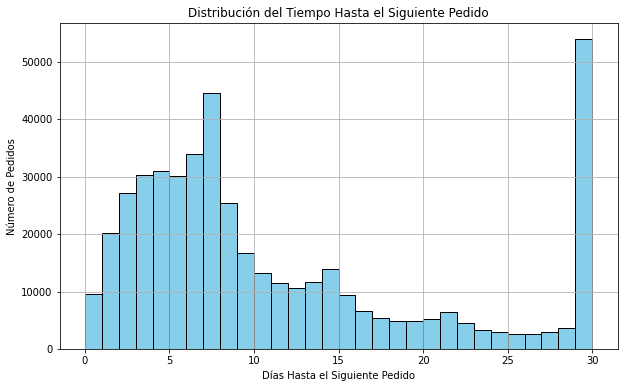

In [43]:
import matplotlib.pyplot as plt

# Eliminar los valores nulos en 'days_since_prior_order'
orders_clean = orders.dropna(subset=['days_since_prior_order'])

# Crear el histograma
plt.figure(figsize=(10, 6))
plt.hist(orders_clean['days_since_prior_order'], bins=30, color='skyblue', edgecolor='black')

# Añadir etiquetas y título
plt.title('Distribución del Tiempo Hasta el Siguiente Pedido')
plt.xlabel('Días Hasta el Siguiente Pedido')
plt.ylabel('Número de Pedidos')

# Mostrar el gráfico
plt.grid(True)
plt.show()

* **Aumento de la frecuencia luego de las primeras 2 semanas:** Observamos un aumento en la frecuencia de pedidos a medida que nos alejamos de la primera compra, especialmente entre los 7 y 8 días. Esto indica que gran volumen de clientes realizan pedidos con mucha frecuencia en las primeras semanas después de su compra inicial.


* **Mayor frecuencia de pedidos alrededor del mes:** La mayor concentración de pedidos se encuentra alrededor de los 30 días, lo que sugiere una tendencia de compras mensuales por parte de los clientes, por lo que podriamos inferir que la mayoría de los clientes en Instacart son trabajadores dependientes.

# [B]

1. ¿Existe alguna diferencia entre las distribuciones `'order_hour_of_day'` de los miércoles y los sábados? Traza gráficos de barra de `'order_hour_of_day'` para ambos días en la misma figura y describe las diferencias que observes.
2. Grafica la distribución para el número de órdenes que hacen los clientes (es decir, cuántos clientes hicieron solo 1 pedido, cuántos hicieron 2, cuántos 3, y así sucesivamente...).
3. ¿Cuáles son los 20 principales productos que se piden con más frecuencia (muestra su identificación y nombre)?

### [B1] Diferencia entre miércoles y sábados para  `'order_hour_of_day'`. Traza gráficos de barra para los dos días y describe las diferencias que veas.

In [44]:
import matplotlib.pyplot as plt

# Filtrar los datos para obtener pedidos realizados solo los miércoles y los sábados
orders_wednesday = orders[orders['order_dow'] == 2]
orders_saturday = orders[orders['order_dow'] == 5]

# Contar la cantidad de pedidos en cada hora del día para miércoles y sábados
orders_per_hour_wednesday = orders_wednesday['order_hour_of_day'].value_counts().sort_index()
orders_per_hour_saturday = orders_saturday['order_hour_of_day'].value_counts().sort_index()

# Crear el gráfico de líneas
plt.figure(figsize=(12, 6))
plt.plot(orders_per_hour_wednesday.index, orders_per_hour_wednesday, marker='o', linestyle='-', color='skyblue', label='Miércoles')
plt.plot(orders_per_hour_saturday.index, orders_per_hour_saturday, marker='o', linestyle='-', color='salmon', label='Sábado')

# Añadir etiquetas y título
plt.title('Distribución de Pedidos por Hora del Día')
plt.xlabel('Hora del Día')
plt.ylabel('Número de Pedidos')
plt.legend()

# Mostrar el gráfico
plt.xticks(range(24))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

* **Volumen de pedidos:** La diferencia más evidente es el volumen total de pedidos. Los miercoles superan ampliamente a los sabados en número de pedidos en casi todas las horas del día.


* **Patrones de distribución:** Ambas gráficas presentan un patrón bimodal con dos picos claros.


* **Horarios de mayor actividad:** En los miercoles, los picos de actividad se concentran en la mañana y la tarde-noche, mientras que en los sabados hay una menor demanda y se produce un evento extraordinario a las 15:00 hrs con un mayor numero de pedidos en comparación al miercoles a esa misma hora.

### [B2] ¿Cuál es la distribución para el número de pedidos por cliente?

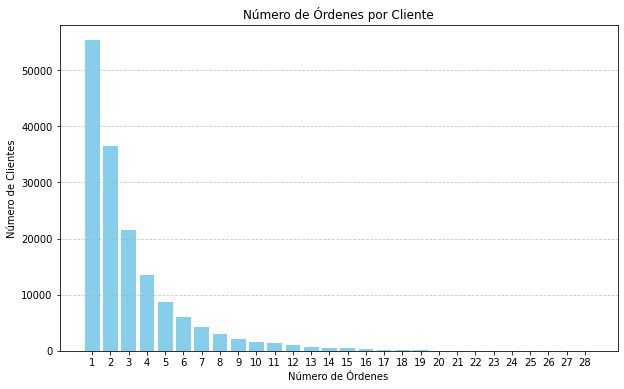

In [45]:
import matplotlib.pyplot as plt

# Contar la cantidad de órdenes que cada usuario ha realizado
order_counts_per_user = orders['user_id'].value_counts()

# Contar la cantidad de usuarios que han realizado cada cantidad de órdenes
user_counts_per_order = order_counts_per_user.value_counts().sort_index()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(user_counts_per_order.index, user_counts_per_order, color='skyblue')

# Añadir etiquetas y título
plt.title('Número de Órdenes por Cliente')
plt.xlabel('Número de Órdenes')
plt.ylabel('Número de Clientes')

# Mostrar el gráfico
plt.xticks(range(1, user_counts_per_order.index.max() + 1))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Se observa una distribución exponencial negativa descendente. Hay una gran cantidad de clientes que han comprado una sola vez, luego hay un porcentaje de retención constante compra a compra de alrededor de 60 %.

### [B3] ¿Cuáles son los 20 productos más populares (muestra su ID y nombre)?

In [46]:
# Paso 1: Contar la frecuencia de cada producto
product_frequency = order_products['product_id'].value_counts()

# Paso 2: Ordenar los resultados para encontrar los productos más pedidos
top_products_ids = product_frequency.head(20).index

# Paso 3: Unir esta información con la tabla 'products' para obtener los nombres de los productos
top_products = products[products['product_id'].isin(top_products_ids)][['product_id', 'product_name']]

# Paso 4: Obtener la frecuencia de cada producto
top_products['frequency'] = top_products_ids.map(product_frequency)

# Reiniciar el índice y establecerlo para que comience desde 1
top_products.reset_index(drop=True, inplace=True)
top_products.index += 1

# Mostrar los 20 productos más populares junto con su ID, nombre y frecuencia
top_products

product_id              product_name  frequency
1         5876             Organic Lemon      66050
2         8277  Apple Honeycrisp Organic      53297
3        13176    Bag of Organic Bananas      37039
4        16797              Strawberries      33971
5        21137      Organic Strawberries      29773
6        21903      Organic Baby Spinach      24689
7        22935      Organic Yellow Onion      21495
8        24852                    Banana      20018
9        24964            Organic Garlic      19690
10       26209                     Limes      19600
11       27845        Organic Whole Milk      19197
12       27966       Organic Raspberries      15898
13       28204        Organic Fuji Apple      15292
14       39275       Organic Blueberries      14584
15       40706    Organic Grape Tomatoes      13879
16       45007          Organic Zucchini      13675
17       47209      Organic Hass Avocado      12544
18       47626               Large Lemon      12232
19       47766           Organic Avocado      11993
20       49683            Cucumber Kirby      11781

Observamos que los productos más populares son productos orgánicos y/o frutales, todos con una frequencia mayor a 11000. 

# [C]

1. ¿Cuántos artículos suelen comprar las personas en un pedido? ¿Cómo es la distribución?
2. ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?
3. Para cada producto, ¿cuál es la tasa de repetición del pedido (número de repeticiones de pedido/total de pedidos?
4. Para cada cliente, ¿qué proporción de los productos que pidió ya los había pedido? Calcula la tasa de repetición de pedido para cada usuario en lugar de para cada producto.
5. ¿Cuáles son los 20 principales artículos que la gente pone primero en sus carritos (muestra las IDs de los productos, sus nombres, y el número de veces en que fueron el primer artículo en añadirse al carrito)?

### [C1] ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?

In [47]:
# Paso 1: Contar el número de productos diferentes por pedido
products_per_order = order_products.groupby('order_id')['product_id'].nunique()

# Paso 2: Calcular el número promedio de productos diferentes por pedido
average_products_per_order = products_per_order.mean()
print("Número promedio de productos diferentes por pedido:", average_products_per_order)

# Paso 3: Crear un histograma para visualizar la distribución
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(products_per_order, bins=30, color='skyblue', edgecolor='black')
plt.title('Distribución del número de productos diferentes por pedido')
plt.xlabel('Número de productos diferentes por pedido')
plt.ylabel('Frecuencia')
plt.grid(True)

# Fijar los límites del eje x de 0 a 50
plt.xlim(0, 50)

plt.show()

Número promedio de productos diferentes por pedido: 10.098983215049127


Se observa una tendencia descendente a medida que aumenta el numero de productos. La distribución claramente se concentra entre 0 - 5 productos con una frecuencia de mas de 140000.

### [C2] ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?

In [48]:
import pandas as pd
import matplotlib.pyplot as plt

# Filtrar solo las órdenes donde el producto fue reordenado
reordered_frequency = order_products[order_products['reordered'] == 1]

# Unir con el DataFrame de productos para asegurar la correcta correspondencia de nombres
df_merge = reordered_frequency.merge(products, on="product_id")

# Agrupar por ID y nombre del producto, contar y ordenar
top_reordered = df_merge.groupby(["product_id", "product_name"]).size().sort_values(ascending=False).head(20)

# Mostrar Tabla Obtenida
top_reordered

product_id  product_name            
24852       Banana                      55763
13176       Bag of Organic Bananas      44450
21137       Organic Strawberries        28639
21903       Organic Baby Spinach        26233
47209       Organic Hass Avocado        23629
47766       Organic Avocado             18743
27845       Organic Whole Milk          16251
47626       Large Lemon                 15044
27966       Organic Raspberries         14748
16797       Strawberries                13945
26209       Limes                       13327
22935       Organic Yellow Onion        11145
24964       Organic Garlic              10411
45007       Organic Zucchini            10076
49683       Cucumber Kirby               9538
28204       Organic Fuji Apple           8989
8277        Apple Honeycrisp Organic     8836
39275       Organic Blueberries          8799
5876        Organic Lemon                8412
49235       Organic Half & Half          8389
dtype: int64

In [49]:
import pandas as pd
import matplotlib.pyplot as plt

# Filtrar solo las órdenes donde el producto fue reordenado
reordered_frequency = order_products[order_products['reordered'] == 1]

# Unir con el DataFrame de productos para asegurar la correcta correspondencia de nombres
df_merge = reordered_frequency.merge(products, on="product_id")

# Agrupar por ID y nombre del producto, contar y ordenar
top_reordered = df_merge.groupby(["product_id", "product_name"]).size().sort_values(ascending=False).head(20)

# Mostrar Tabla Obtenida
print(top_reordered)

# Graficar
plt.figure(figsize=(12, 8))
top_reordered.sort_values().plot(kind='barh')
plt.xlabel('Frecuencia')
plt.ylabel('Producto')
plt.title('Top 20 productos más reordenados')
plt.show()

product_id  product_name            
24852       Banana                      55763
13176       Bag of Organic Bananas      44450
21137       Organic Strawberries        28639
21903       Organic Baby Spinach        26233
47209       Organic Hass Avocado        23629
47766       Organic Avocado             18743
27845       Organic Whole Milk          16251
47626       Large Lemon                 15044
27966       Organic Raspberries         14748
16797       Strawberries                13945
26209       Limes                       13327
22935       Organic Yellow Onion        11145
24964       Organic Garlic              10411
45007       Organic Zucchini            10076
49683       Cucumber Kirby               9538
28204       Organic Fuji Apple           8989
8277        Apple Honeycrisp Organic     8836
39275       Organic Blueberries          8799
5876        Organic Lemon                8412
49235       Organic Half & Half          8389
dtype: int64


El producto que se vuelve a pedir con mas frecuencia es **Banana** con una frecuencia de mas de 50000. 

### [C3] Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?

In [50]:
# Calcular la frecuencia de repeticiones para cada producto
reordered_frequency = order_products[order_products['reordered'] == 1]['product_id'].value_counts()

# Crear un DataFrame para almacenar la frecuencia de repeticiones de cada producto
reordered_df = pd.DataFrame({'product_id': reordered_frequency.index, 'reordered_orders': reordered_frequency.values})

# Unir esta información con el DataFrame 'order_products' utilizando 'product_id' como clave de unión
order_products = pd.merge(order_products, reordered_df, on='product_id', how='left')

# Calcular la frecuencia total de cada producto
product_frequency = order_products['product_id'].value_counts()

# Calcular la proporción de repeticiones para cada producto y agregarla como una nueva columna
order_products['reorder_ratio'] = order_products['reordered_orders'] / product_frequency[order_products['product_id']].values

# Mostrar los primeros registros del DataFrame order_products para verificar los resultados
order_products.head()

order_id  product_id  add_to_cart_order  reordered  reordered_orders  \
0   2141543       11440                 17          0             841.0   
1    567889        1560                  1          1              95.0   
2   2261212       26683                  1          1             252.0   
3    491251        8670                 35          1             871.0   
4   2571142        1940                  5          1            2565.0   

   reorder_ratio  
0       0.703177  
1       0.678571  
2       0.604317  
3       0.458421  
4       0.791422

In [51]:
print(order_products['reorder_ratio'].mean())

0.5935812827481911


La proporcion promedio de veces que se vuelve a pedir un producto es alrededor de un 60% para todos los productos entregados por Instacart, es un buen indicador para poder crear promociones que permitan fidelizar clientes e ir incrementando aquellos ratios.

### [C4] Para cada cliente, ¿qué proporción de sus productos ya los había pedido?

In [52]:
# Paso 1: Calcular la cantidad total de productos pedidos por cada clienteimport pandas as pd

# Fusionar los dataframes order_products y orders para obtener user_id asociado a cada pedido
merged_data = pd.merge(order_products, orders, on='order_id', how='left')

# Paso 1: Calcular la cantidad total de productos pedidos por cada cliente
total_products_per_customer = merged_data.groupby('user_id')['product_id'].count()

# Paso 2: Calcular la cantidad total de productos que se vuelven a pedir por cada cliente
reordered_products_per_customer = merged_data[merged_data['reordered'] == 1].groupby('user_id')['product_id'].count()

# Paso 3: Calcular la proporción de productos que se vuelven a pedir para cada cliente
reorder_ratio_per_customer = reordered_products_per_customer / total_products_per_customer

# Paso 4: Agregar la columna al DataFrame order_products
order_products['reorder_ratio_per_customer'] = reorder_ratio_per_customer

# Mostrar los primeros registros del DataFrame con la nueva columna
print(order_products.head())

   order_id  product_id  add_to_cart_order  reordered  reordered_orders  \
0   2141543       11440                 17          0             841.0   
1    567889        1560                  1          1              95.0   
2   2261212       26683                  1          1             252.0   
3    491251        8670                 35          1             871.0   
4   2571142        1940                  5          1            2565.0   

   reorder_ratio  reorder_ratio_per_customer  
0       0.703177                         NaN  
1       0.678571                         NaN  
2       0.604317                    0.038462  
3       0.458421                         NaN  
4       0.791422                         NaN  


In [53]:
reorder_ratio_per_customer

user_id
2         0.038462
4              NaN
5         0.666667
6              NaN
7         0.928571
            ...   
206203    0.222222
206206    0.714286
206207    0.891304
206208    0.696000
206209    0.320000
Name: product_id, Length: 149626, dtype: float64

In [54]:
print(order_products['reorder_ratio_per_customer'].mean()) # Promedio de reordenes de productos por cliente

0.556751215911923


Observamos que en promedio un 56% de los clientes ya habia comprado el mismo producto anteriormente. Eso explica cierta conexión entre el producto comprado por los clientes y la plataforma usada en este caso que es Instacart. 

### [C5] ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?

In [55]:
# Filtrar los productos que se agregaron primero al carrito (add_to_cart_order == 1)
first_in_cart = order_products[order_products['add_to_cart_order'] == 1]

# Contar la frecuencia de cada producto que se agregó primero al carrito
first_in_cart_frequency = first_in_cart['product_id'].value_counts()

# Seleccionar los 20 principales artículos que se ponen primero en los carritos
top_first_in_cart = first_in_cart_frequency.head(20)

# Mostrar los resultados
print(top_first_in_cart)

24852    15562
13176    11026
27845     4363
21137     3946
47209     3390
21903     3336
47766     3044
19660     2336
16797     2308
27966     2024
44632     1914
49235     1797
47626     1737
196       1733
38689     1397
26209     1370
12341     1340
5785      1310
27086     1309
22935     1246
Name: product_id, dtype: int64


    product_id                 product_name  count
0        24852                       Banana  15562
1        13176       Bag of Organic Bananas  11026
2        27845           Organic Whole Milk   4363
3        21137         Organic Strawberries   3946
4        47209         Organic Hass Avocado   3390
5        21903         Organic Baby Spinach   3336
6        47766              Organic Avocado   3044
7        19660                 Spring Water   2336
8        16797                 Strawberries   2308
9        27966          Organic Raspberries   2024
10       44632   Sparkling Water Grapefruit   1914
11       49235          Organic Half & Half   1797
12       47626                  Large Lemon   1737
13         196                         Soda   1733
14       38689     Organic Reduced Fat Milk   1397
15       26209                        Limes   1370
16       12341                Hass Avocados   1340
17        5785  Organic Reduced Fat 2% Milk   1310
18       27086                 

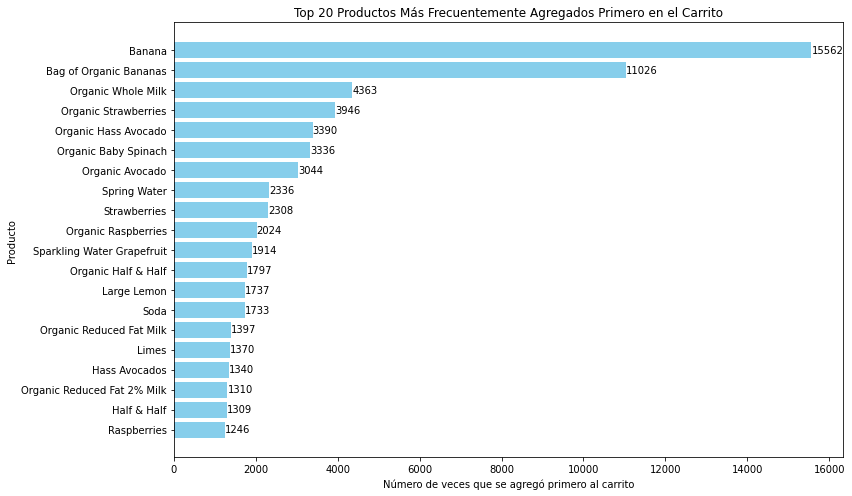

In [56]:
import pandas as pd
import matplotlib.pyplot as plt

# Primero, realiza un merge de ambos DataFrames para asegurarte de tener toda la información necesaria en uno solo
df_merge = order_products.merge(products, on="product_id")

# Filtrar los productos que se agregaron primero al carrito
first_in_cart = df_merge[df_merge["add_to_cart_order"] == 1]

# Agrupar por product_id y product_name, contar y ordenar para obtener los 20 principales productos
top_first_in_cart = first_in_cart.groupby(["product_id", "product_name"])["product_id"].count().sort_values(ascending=False).head(20)

# Convertir a DataFrame para facilitar la visualización
top_first_in_cart_df = top_first_in_cart.reset_index(name='count')

# Mostrar los resultados
print(top_first_in_cart_df)

# Crear el gráfico de barras
plt.figure(figsize=(12, 8))
bars = plt.barh(top_first_in_cart_df['product_name'], top_first_in_cart_df['count'], color='skyblue')
plt.xlabel('Número de veces que se agregó primero al carrito')
plt.ylabel('Producto')
plt.title('Top 20 Productos Más Frecuentemente Agregados Primero en el Carrito')
plt.gca().invert_yaxis()  # Invertir el eje y para que los más frecuentes estén arriba

# Agregar etiquetas a las barras para mostrar las cantidades exactas
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{int(bar.get_width())}', 
             va='center', ha='left', fontsize=10, color='black')

plt.show()

El articulo mas puesto en primer lugar por los clientes en el carrito es la **Banana** y **Bag of Organic Bananas**, luego productos orgánicos y/ frutales.

### Conclusion general del proyecto:

A lo largo de este proyecto, hemos explorado exhaustivamente los datos de pedidos de un supermercado para comprender mejor el comportamiento de compra de los clientes. Utilizando técnicas de análisis de datos y visualización, hemos identificado patrones y tendencias importantes que pueden ayudar a la empresa a tomar decisiones informadas para mejorar la experiencia del cliente y aumentar las ventas.

Comenzamos por preprocesar los datos, asegurándonos de manejar valores faltantes y ajustar el formato de las columnas según fuera necesario. Luego, realizamos análisis específicos para responder preguntas clave:

**1. Análisis del horario de compra:** Verificamos la distribución de pedidos a lo largo del día y de la semana para comprender cuándo los clientes prefieren realizar sus compras.


**2. Identificación de productos populares:** Utilizando técnicas de conteo y agrupación, identificamos los productos más populares en términos de frecuencia de pedido y repetición.


**3. Análisis de patrones de repetición de compra:** Exploramos cuántos clientes vuelven a pedir productos y calculamos la proporción de productos que se vuelven a pedir para cada cliente.


**4. Visualización de resultados:** Presentamos nuestros hallazgos de manera clara y efectiva utilizando diversos tipos de visualizaciones, como gráficos de barras y gráficos de líneas.


En resumen, este proyecto ha proporcionado una comprensión profunda del comportamiento de compra de los clientes en el supermercado, lo que puede ser invaluable para la toma de decisiones comerciales y estratégicas en el futuro. Además, hemos demostrado cómo el análisis de datos puede utilizarse para obtener información útil y tomar decisiones fundamentadas en el ámbito empresarial.